<a href="https://colab.research.google.com/github/Keerthana8888/Online-Payment-fraud-Detection/blob/main/Code%20File/Online_Payment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Online Payment Fraud Detection Using Machine Learning </center> </h1>

# Approach

1. **Import Libraries**: Load necessary libraries for data processing, visualization, and model building.

2. **Load Dataset**: Read the dataset and inspect its structure.

3. **Exploratory Data Analysis**: Analyze data patterns, handle missing values, and visualize relationships.

4. **Dataset Splitting**: Split data into training and testing sets for model evaluation.

5. **Model Evaluation**: Define metrics to assess model performance.

6. **Multi-Variant Model Building**: Train multiple models (e.g., Logistic Regression, Decision Tree).

7. **Model Comparison**: Compare models using evaluation metrics to choose the best.

8. **Prediction**: Use the best model to make predictions on new data.

9. **Application**: Deploy the model for practical use.

## Problem Statement

* The goal of this project Online Payment Fraud Detection dataset is to accurately identify and classify fraudulent transactions in an online payment system.
* With the increasing volume of digital transactions, the need for efficient and reliable fraud detection is critical to prevent financial losses and enhance transaction security.
* The task involves analyzing a dataset of transaction features and developing a machine learning model that can differentiate between genuine and fraudulent transactions, minimizing false positives while maximizing detection accuracy for fraud prevention.

# Import The Libraries

In [1]:
#Standard Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Models Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluators
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Gradio for building interfaces
!pip install gradio
import gradio as gr

# Load The Dataset

In [2]:
data = pd.read_csv("/content/onlinefraud.csv") #Read the file

*  Read the onlinefraud.csv file into a pandas DataFrame named 'data'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Columns**

* **Step:** represents a unit of time where 1 step equals 1 hour
* **Type:** type of online transaction
* **Amount:** the amount of the transaction
* **Name Origin:** customer starting the transaction
* **Old Balance Origin:** balance before the transaction
* **New Balance Origin:** balance after the transaction
* **Name Destination:** recipient of the transaction
* **Old Balance Destination:** initial balance of recipient before the transaction
* **New Balance Destination:** the new balance of recipient after the transaction
* **is Fraud:** fraud transaction

In [4]:
data.shape # Get the dimensions (rows, columns) of the DataFrame

(6362620, 11)

In [5]:
data.head() #displays the first 5 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.describe() #descriptive statistics for numerical features

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Exploratory Data Analysis

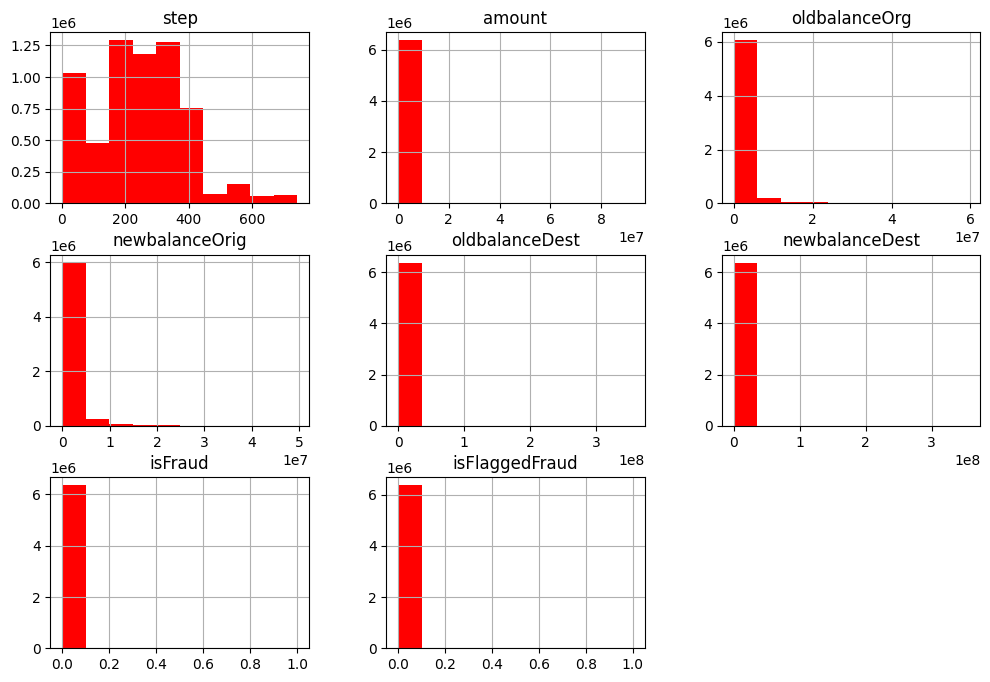

In [7]:
fig=data.hist(figsize=(12,8), color='red')
plt.show()

1. **Step:**
 The distribution is skewed to the right, indicating that most transactions occur in the earlier
steps of the dataset.
2. **Type:**
 The distribution is not very informative as it only represents categorical data.
3. **Amount:**
 The distribution is heavily skewed to the right, indicating that most transactions have smaller
amounts, while a few transactions have significantly larger amounts. This suggests the presence
of outliers or unusual transactions.
4. **oldbalanceOrg:**
 The distribution is also skewed to the right, indicating that most origin accounts have lower
balances, while a few accounts have significantly higher balances.
5. **newbalanceOrig:**
 Similar to oldbalanceOrg, the distribution is skewed to the right, suggesting that most origin
accounts have lower final balances.
6. **oldbalanceDest:**
 The distribution is skewed to the right, indicating that most destination accounts have lower
initial balances.

7. **newbalanceDest:**
 The distribution is also skewed to the right, suggesting that most destination accounts have
lower final balances

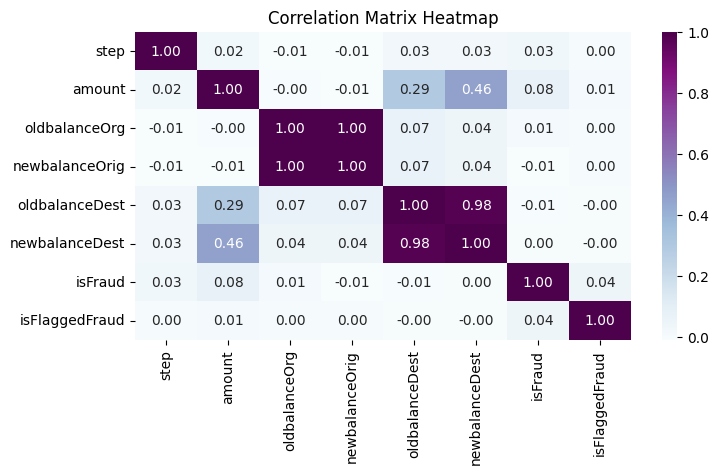

In [8]:
# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Strong Positive Correlations:**

* oldbalanceOrg and newbalanceOrig exhibit a strong positive correlation (correlation coefficient of 1.00), indicating that these features are highly correlated. This suggests that changes in the original balance are directly reflected in the new balance.

* oldbalanceDest and newbalanceDest also show a strong positive correlation (correlation coefficient of 0.98), indicating a similar relationship between the destination account's original and new balances.

**Weak Correlations:**

* The step and type features have weak correlations with other numerical features, indicating that they may not be as influential in predicting fraudulent transactions.

In [9]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

*  **Cash out** is **the most numerous** transaction type, followed by payment, cash in, transfer and debit types.


In [10]:
# Exploring transaction type
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [11]:
data.isnull().sum() #null values or not

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


* No missing values were detected

In [12]:
# Drop columns
data = data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

 * the features “nameOrig”, “nameDest”,
and “isFlaggedFraud”  deemed redundant and subsequently removed from the dataset

In [13]:
# transform the categorical features into numerical
# No Fraud and Fraud labels to have a better understanding of the output

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     2   9839.64       170136.0       160296.36             0.0   
1     1     2   1864.28        21249.0        19384.72             0.0   
2     1     4    181.00          181.0            0.00             0.0   
3     1     1    181.00          181.0            0.00         21182.0   
4     1     2  11668.14        41554.0        29885.86             0.0   

   newbalanceDest   isFraud  
0             0.0  No Fraud  
1             0.0  No Fraud  
2             0.0     Fraud  
3             0.0     Fraud  
4             0.0  No Fraud  


* The categorical variables type and isFraud were transformed into numerical representations

#Dataset Splitting

In [14]:
# splitting the data
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

* The dataset is split into 80% for training the model and 20% for evaluating its performance on unseen data.

#Model Evaluation

In [16]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  acc_score = accuracy_score(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The Accuracy of the model is: ', round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

* Evaluation metrics helps us gain valuable insights into the model's performance and
identify areas for potential improvement.

#Multi-Varient

## Logistic Regression

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(max_iter=1000)

In [18]:
y_hat_train_lr = lr.predict(x_train)
y_hat_test_lr = lr.predict(x_test)

In [19]:
model_eval(y_train, y_hat_train_lr)

The Accuracy of the model is:  1.0
[[   3092    4304]
 [    612 5718350]]
              precision    recall  f1-score   support

       Fraud       0.83      0.42      0.56      7396
    No Fraud       1.00      1.00      1.00   5718962

    accuracy                           1.00   5726358
   macro avg       0.92      0.71      0.78   5726358
weighted avg       1.00      1.00      1.00   5726358



In [20]:
model_eval(y_test, y_hat_test_lr)

The Accuracy of the model is:  1.0
[[   345    472]
 [    68 635377]]
              precision    recall  f1-score   support

       Fraud       0.84      0.42      0.56       817
    No Fraud       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.92      0.71      0.78    636262
weighted avg       1.00      1.00      1.00    636262



* The model achieves perfect accuracy on the test set, but the recall score for
fraud detection remains low at 0.42.

## Decision Tree

In [21]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [23]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the model is:  1.0
[[   7396       0]
 [      1 5718961]]
              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00      7396
    No Fraud       1.00      1.00      1.00   5718962

    accuracy                           1.00   5726358
   macro avg       1.00      1.00      1.00   5726358
weighted avg       1.00      1.00      1.00   5726358



In [24]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the model is:  1.0
[[   724     93]
 [    77 635368]]
              precision    recall  f1-score   support

       Fraud       0.90      0.89      0.89       817
    No Fraud       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.95      0.94      0.95    636262
weighted avg       1.00      1.00      1.00    636262



* The model achieves high accuracy but also indicate that the model struggles to capture all
instances of fraud, recall (0.89) for the Fraud class.

# Model Comparison

In [25]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9991512930207996


In [26]:
#Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
print(dtree.score(x_test, y_test))

0.9997422445470576


* Both the Logistic Regression and Decision Tree models achieved high accuracy scores on the test set, with scores close to 0.999

## Evaluation Metrics

In [31]:
# precision_score, recall_score, f1_score, roc_auc_score, roc_curve to compare dtree and lr in a table format

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def evaluate_model(model_name, y_true, y_pred):
  precision = precision_score(y_true, y_pred, pos_label='Fraud', average='binary')
  recall = recall_score(y_true, y_pred, pos_label='Fraud', average='binary')
  f1 = f1_score(y_true, y_pred, pos_label='Fraud', average='binary')
  try:
    roc_auc = roc_auc_score(y_true, y_pred, labels=['No Fraud', 'Fraud'])
  except ValueError:
    roc_auc = 0  # Handle cases where only one class is present in predictions

  return [model_name, precision, recall, f1, roc_auc]

results = []
results.append(evaluate_model("Logistic Regression", y_test, y_hat_test_lr))
results.append(evaluate_model("Decision Tree", y_test, y_hat_test_dtree))

df_results = pd.DataFrame(results, columns=["Model", "Precision", "Recall", "F1-Score", "ROC AUC"])
df_results

,Model,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.835351,0.422277,0.560976,0
1,Decision Tree,0.903870,0.886169,0.894932,0


* The Decision Tree model outperforms the Logistic Regression model in precision, recall, and F1-score.

# Prediction

In [28]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[1, 8900.2, 8990.2, 0.0]])
print(dtree.predict(features))

['Fraud']


In [29]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[2, 9839.64, 170136, 160296.36]])
print(dtree.predict(features))

['No Fraud']


##Gradio Interface

In [30]:
#creating an app with gradio
def predict_fraud(type, amount, oldbalanceOrg, newbalanceOrig):
  features = np.array([[type, amount, oldbalanceOrg, newbalanceOrig]])
  prediction = dtree.predict(features)[0]
  return prediction

iface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.Number(label="Type"),
        gr.Number(label="Amount"),
        gr.Number(label="Old Balance Origin"),
        gr.Number(label="New Balance Origin")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Fraud Prediction",
    description="Predict if a transaction is fraudulent based on transaction details."
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d545f30cc8f0f22dd2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


* Hence, the time series forecasting project for *Corporación Favorita* was executed successfully, using CNNs to accurately capture sales patterns and improve prediction accuracy. This solution aids strategic decisions and efficient inventory management.